In [1]:
from __future__ import print_function, division
%matplotlib inline


import os

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

In [2]:
import numpy as np
import modisco
import theano
print("Theano version:",theano.__version__)
import sys
print (sys.version)


Theano version: 1.0.2
2.7.15 |Anaconda, Inc.| (default, May  1 2018, 23:32:55) 
[GCC 7.2.0]


Using cuDNN version 7001 on context None
Mapped name None to device cuda0: GeForce GTX TITAN X (0000:08:00.0)


1 task
CTCF / GM12878 / ENCSR000DZN

![laplace_b](figures/laplace_0.png)
[logs](logs/modisco.log)

Metaclusters heatmap


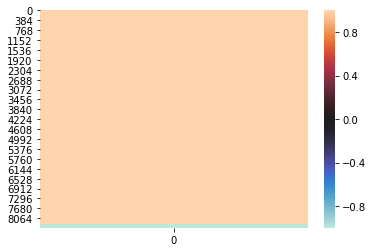

metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 7240
Task 55 hypothetical scores:


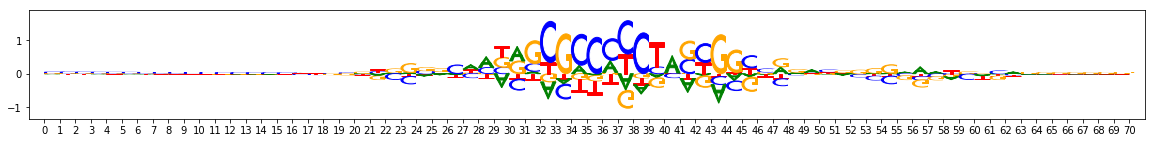

Task 55 actual importance scores:


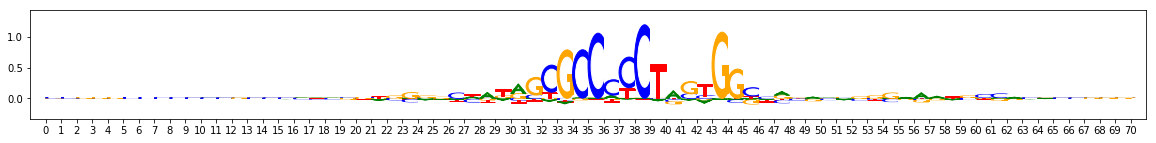

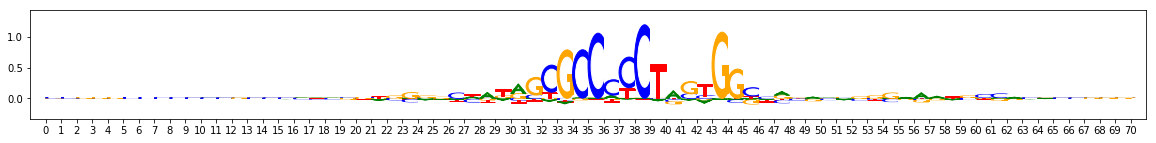

onehot, fwd and rev:


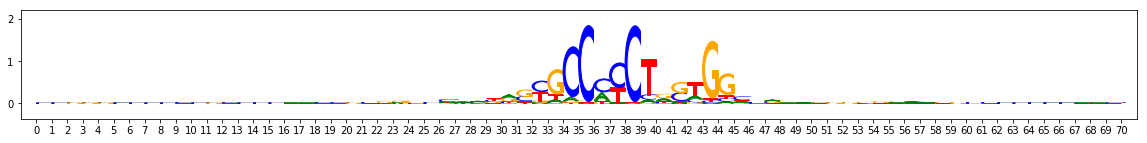

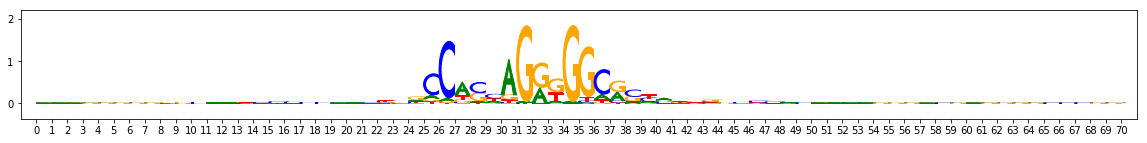

metacluster_0 pattern_1
total seqlets: 653
Task 55 hypothetical scores:


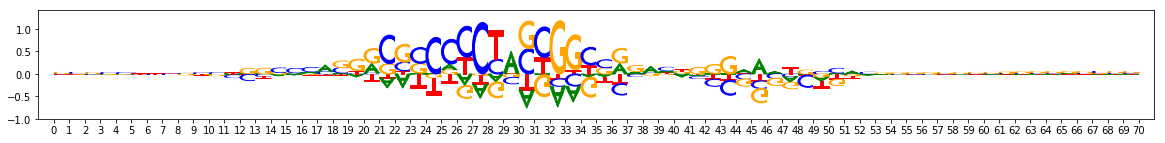

Task 55 actual importance scores:


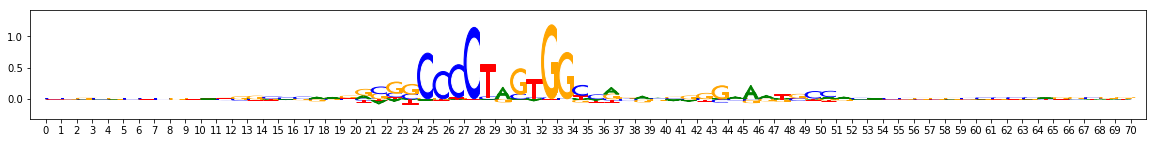

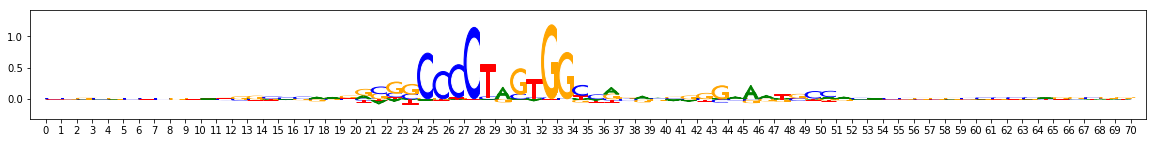

onehot, fwd and rev:


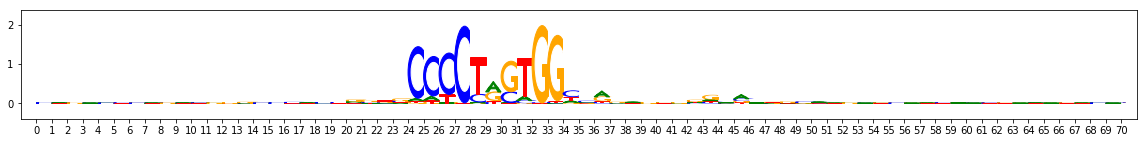

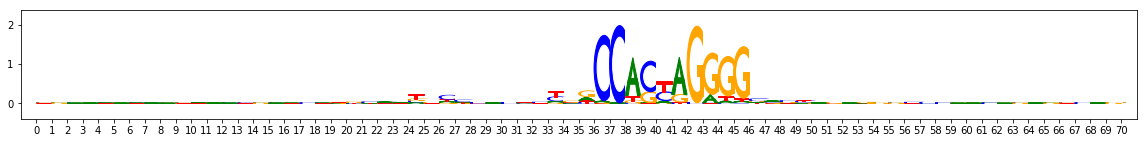

metacluster_1
activity pattern: [-1]
metacluster_1 pattern_0
total seqlets: 73
Task 55 hypothetical scores:


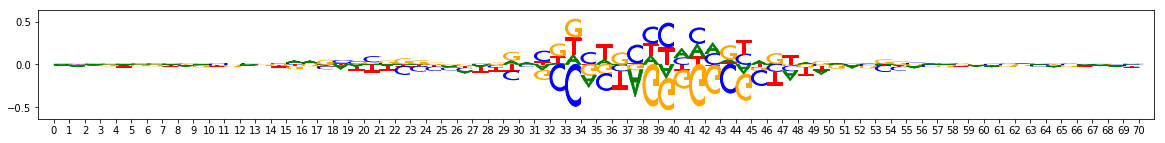

Task 55 actual importance scores:


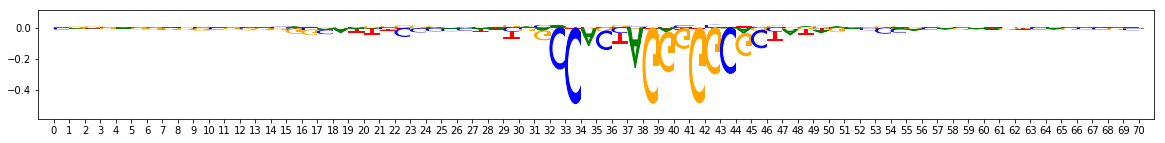

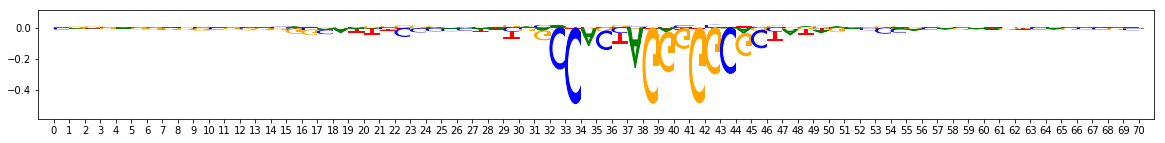

onehot, fwd and rev:


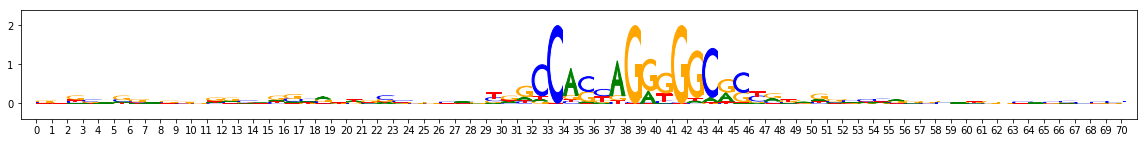

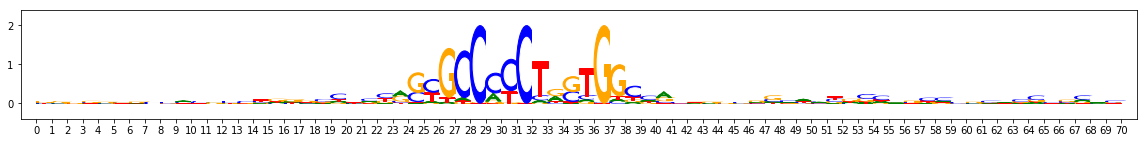

In [5]:
from collections import Counter
from modisco.visualization import viz_sequence
reload(viz_sequence)
from matplotlib import pyplot as plt
import h5py

import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.aggregator
reload(modisco.aggregator)

hdf5_results = h5py.File("results.hdf5","r")

print("Metaclusters heatmap")
import seaborn as sns
activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns.heatmap(activity_patterns, center=0)
plt.show()

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        background = np.array([0.27, 0.23, 0.23, 0.27])
        print("Task 55 hypothetical scores:")
        viz_sequence.plot_weights(pattern["task55_hypothetical_contribs"]["fwd"])
        print("Task 55 actual importance scores:")
        viz_sequence.plot_weights(pattern["task55_contrib_scores"]["fwd"])
        

        viz_sequence.plot_weights(pattern["task55_contrib_scores"]["fwd"])
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]),
                                                        background=background)) 
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]),
                                                        background=background)) 
        
hdf5_results.close()

modisco log file
```
2018-08-03 07:18:35 INFO  /home/ktian/kundajelab/tfnet/scripts/run_tfmodisco.py scores/hyp_scores_task_ subset_nobg.fa subset_nobg.tsv 55 56
2018-08-03 07:18:35 DEBUG $HOME=/home/ktian
2018-08-03 07:18:35 DEBUG matplotlib data path /home/ktian/anaconda3/envs/modisco_dev/lib/python2.7/site-packages/matplotlib/mpl-data
2018-08-03 07:18:35 DEBUG loaded rc file /home/ktian/anaconda3/envs/modisco_dev/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
2018-08-03 07:18:35 DEBUG matplotlib version 2.2.2
2018-08-03 07:18:35 DEBUG interactive is False
2018-08-03 07:18:35 DEBUG platform is linux2

Using cuDNN version 7001 on context None
Mapped name None to device cuda0: GeForce GTX TITAN X (0000:08:00.0)
2018-08-03 07:18:38 DEBUG Theano version:1.0.2
2018-08-03 07:18:38 DEBUG 2.7.15 |Anaconda, Inc.| (default, May  1 2018, 23:32:55) 
[GCC 7.2.0]
2018-08-03 07:18:38 DEBUG method file prefix is scores/hyp_scores_task_, input seq file is subset_nobg.fa, input tsv is subset_nobg.tsv, start_task is 55 end_task is 56
2018-08-03 07:18:40 DEBUG lenth of sequences = 436734
2018-08-03 07:18:59 DEBUG merged overlaps based on in_tsv subset_nobg.tsv, 436734 seqs merged into 16330 seqs, max len 5836
2018-08-03 07:19:04 DEBUG shape of hyp_score (440, 4)
2018-08-03 07:19:04 DEBUG shape of score (440, 4)
On task task55
Computing windowed sums
Computing threshold
2018-08-03 07:19:36 DEBUG CACHEDIR=/home/ktian/.cache/matplotlib
2018-08-03 07:19:36 DEBUG Using fontManager instance from /home/ktian/.cache/matplotlib/fontList.json
2018-08-03 07:19:36 DEBUG backend agg version v2.2
2018-08-03 07:19:37 DEBUG findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/home/ktian/anaconda3/envs/tfenv/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
Lablace_b: 0.18710321622628606 and 0.6568062746956389
Thresholds: -2.2849800214745883 and 6.100126143544912
#fdrs pass: 1629 and 110958
CDFs: 0.9999950315555792 and 0.9999074311303479
Est. FDRs: 0.00999061682075467 and 0.009999884834730525
saving plot to figures/laplace_0.png
Got 8433 coords
After resolving overlaps, got 8433 seqlets
Across all tasks, the weakest laplace threshold used was: 0.9999074311303479
8433 identified in total
2 activity patterns with support >= 100 out of 3 possible patterns
Metacluster sizes:  [8287, 146]
Idx to activities:  {0: '1', 1: '-1'}
On metacluster 1
Metacluster size 146
Relevant tasks:  ('task55',)
Relevant signs:  (-1,)
(Round 1) num seqlets: 146
(Round 1) Computing coarse affmat
Beginning embedding computation
Computing embeddings
Finished embedding computation in 0.13 s
Starting affinity matrix computations
Normalization computed in 0.02 s
Cosine similarity mat computed in 0.03 s
Normalization computed in 0.03 s
Cosine similarity mat computed in 0.05 s
Finished affinity matrix computations in 0.08 s
(Round 1) Compute nearest neighbors from coarse affmat
Computed nearest neighbors in 0.0 s
(Round 1) Computing affinity matrix on nearest neighbors
Launching nearest neighbors affmat calculation job
Job completed in: 4.04 s
Launching nearest neighbors affmat calculation job
Job completed in: 4.04 s
(Round 1) Computed affinity matrix on nearest neighbors in 8.2 s
Filtered down to 132 of 146
(Round 1) Retained 132 rows out of 146 after filtering
(Round 1) Computing density adapted affmat
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 132 samples in 0.000s...
[t-SNE] Computed neighbors for 132 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 132 / 132
[t-SNE] Mean sigma: 0.272848
(Round 1) Computing clustering
Beginning preprocessing + Louvain
Wrote graph to binary file in 0.00956296920776 seconds
Running Louvain modularity optimization
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    6.8s
[Parallel(n_jobs=20)]: Done 200 out of 200 | elapsed:    8.5s finished
Louvain completed 200 runs in 12.4848849773 seconds
Wrote graph to binary file in 0.0109028816223 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.67537
Louvain completed 51 runs in 22.0936019421 seconds
Preproc + Louvain took 34.6232030392 s
Got 5 clusters after round 1
Counts:
{0: 36, 1: 36, 2: 30, 3: 23, 4: 7}
(Round 1) Aggregating seqlets in each cluster
Aggregating for cluster 0 with 36 seqlets
Trimmed 1 out of 36
Aggregating for cluster 1 with 36 seqlets
Trimmed 5 out of 36
Aggregating for cluster 2 with 30 seqlets
Trimmed 6 out of 30
Dropping cluster 2 with 24 seqlets due to sign disagreement
Aggregating for cluster 3 with 23 seqlets
Trimmed 2 out of 23
Dropping cluster 3 with 21 seqlets due to sign disagreement
Aggregating for cluster 4 with 7 seqlets
Trimmed 0 out of 7
Got 3 clusters
Splitting into subclusters...
Inspecting for spurious merging
Wrote graph to binary file in 0.00173497200012 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00340524
Louvain completed 21 runs in 9.42895293236 seconds
Similarity is 0.9368220363955334; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.00232291221619 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.000345114
After 2 runs, maximum modularity is Q = 0.00115308
Louvain completed 22 runs in 10.6448400021 seconds
Similarity is 0.928338338918431; is_dissimilar is False
Merging on 3 clusters
On merging iteration 1
Computing pattern to seqlet distances
Computing pattern to pattern distances
Collapsing 0 & 1 with prob 0.0020083671008334705 and sim 0.9254505182348629
Collapsing 1 & 2 with prob 4.015222252402367e-05 and sim 0.8810382986387475
Trimmed 0 out of 66
Trimmed 0 out of 73
On merging iteration 2
Computing pattern to seqlet distances
Computing pattern to pattern distances
Got 1 patterns after merging
Performing seqlet reassignment
Got 1 patterns after reassignment
Total time taken is 93.95s
On metacluster 0
Metacluster size 8287
Relevant tasks:  ('task55',)
Relevant signs:  (1,)
(Round 1) num seqlets: 8287
(Round 1) Computing coarse affmat
Beginning embedding computation
Computing embeddings
Finished embedding computation in 7.99 s
Starting affinity matrix computations
Normalization computed in 2.1 s
Cosine similarity mat computed in 6.97 s
Normalization computed in 2.27 s
Cosine similarity mat computed in 7.04 s
Finished affinity matrix computations in 14.31 s
(Round 1) Compute nearest neighbors from coarse affmat
Computed nearest neighbors in 1.27 s
(Round 1) Computing affinity matrix on nearest neighbors
Launching nearest neighbors affmat calculation job
Job completed in: 116.49 s
Launching nearest neighbors affmat calculation job
Job completed in: 119.99 s
(Round 1) Computed affinity matrix on nearest neighbors in 249.23 s
Filtered down to 8225 of 8287
(Round 1) Retained 8225 rows out of 8287 after filtering
(Round 1) Computing density adapted affmat
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 8225 samples in 0.045s...
[t-SNE] Computed neighbors for 8225 samples in 0.679s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8225
[t-SNE] Computed conditional probabilities for sample 2000 / 8225
[t-SNE] Computed conditional probabilities for sample 3000 / 8225
[t-SNE] Computed conditional probabilities for sample 4000 / 8225
[t-SNE] Computed conditional probabilities for sample 5000 / 8225
[t-SNE] Computed conditional probabilities for sample 6000 / 8225
[t-SNE] Computed conditional probabilities for sample 7000 / 8225
[t-SNE] Computed conditional probabilities for sample 8000 / 8225
[t-SNE] Computed conditional probabilities for sample 8225 / 8225
[t-SNE] Mean sigma: 0.183708
(Round 1) Computing clustering
Beginning preprocessing + Louvain
Wrote graph to binary file in 0.543480873108 seconds
Running Louvain modularity optimization
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    1.2s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    9.8s
[Parallel(n_jobs=20)]: Done 200 out of 200 | elapsed:   12.0s finished
Louvain completed 200 runs in 44.5611538887 seconds
Wrote graph to binary file in 18.6391909122 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.693628
After 2 runs, maximum modularity is Q = 0.706642
After 15 runs, maximum modularity is Q = 0.706647
Louvain completed 65 runs in 110.900599957 seconds
Preproc + Louvain took 178.826351881 s
Got 9 clusters after round 1
Counts:
{0: 1493, 1: 1452, 2: 1375, 3: 1004, 4: 977, 5: 705, 6: 677, 7: 510, 8: 32}
(Round 1) Aggregating seqlets in each cluster
Aggregating for cluster 0 with 1493 seqlets
Trimmed 94 out of 1493
Aggregating for cluster 1 with 1452 seqlets
Trimmed 39 out of 1452
Aggregating for cluster 2 with 1375 seqlets
Trimmed 31 out of 1375
Aggregating for cluster 3 with 1004 seqlets
Trimmed 41 out of 1004
Aggregating for cluster 4 with 977 seqlets
Trimmed 25 out of 977
Aggregating for cluster 5 with 705 seqlets
Trimmed 26 out of 705
Aggregating for cluster 6 with 677 seqlets
Trimmed 24 out of 677
Aggregating for cluster 7 with 510 seqlets
Trimmed 13 out of 510
Aggregating for cluster 8 with 32 seqlets
Trimmed 6 out of 32
Got 9 clusters
Splitting into subclusters...
Inspecting for spurious merging
Wrote graph to binary file in 1.92916584015 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00554852
After 7 runs, maximum modularity is Q = 0.0055486
Louvain completed 27 runs in 21.6023519039 seconds
Similarity is 0.959689563834627; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 2.24694395065 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00905922
After 2 runs, maximum modularity is Q = 0.00906096
Louvain completed 22 runs in 16.7090239525 seconds
Similarity is 0.901212703459575; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 1.80026507378 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00644261
After 6 runs, maximum modularity is Q = 0.00644264
After 9 runs, maximum modularity is Q = 0.00644265
Louvain completed 29 runs in 21.7426168919 seconds
Similarity is 0.9377091003129692; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.952630996704 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00594452
After 4 runs, maximum modularity is Q = 0.00594539
After 21 runs, maximum modularity is Q = 0.0059454
Louvain completed 41 runs in 27.3554840088 seconds
Similarity is 0.9430914000643336; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 1.02980589867 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00675581
After 5 runs, maximum modularity is Q = 0.00675582
After 12 runs, maximum modularity is Q = 0.00675583
Louvain completed 32 runs in 21.9801249504 seconds
Similarity is 0.9357983753400125; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.561210870743 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00537745
Louvain completed 21 runs in 13.4198100567 seconds
Similarity is 0.9479107841326525; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.52364897728 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.0095712
Louvain completed 21 runs in 13.3929581642 seconds
Similarity is 0.8657904351597657; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.298518896103 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00680068
Louvain completed 21 runs in 13.0758068562 seconds
Similarity is 0.9375760491564151; is_dissimilar is False
Merging on 9 clusters
On merging iteration 1
Computing pattern to seqlet distances
Computing pattern to pattern distances
Collapsing 2 & 3 with prob 0.0005427485240741646 and sim 0.9553313058901217
Collapsing 1 & 7 with prob 0.000935273962475141 and sim 0.9371705987692951
Collapsing 0 & 3 with prob 0.0008607283196623248 and sim 0.9306108823293878
Collapsing 4 & 5 with prob 0.0014620960080876599 and sim 0.9285208241434638
Collapsing 5 & 7 with prob 0.00019720971930340585 and sim 0.9255246070281372
Collapsing 1 & 4 with prob 0.0003904141755480784 and sim 0.9176204901654377
Collapsing 0 & 2 with prob 0.0009878609417578264 and sim 0.9147800879154252
Collapsing 0 & 7 with prob 6.442467894789162e-05 and sim 0.9100035809991937
Aborting collapse as 0 & 1 have prob 5.8849341921776827e-05 and sim 0.8227094977344569
Aborting collapse as 2 & 4 have prob 8.511656250735546e-05 and sim 0.8114074847690197
Aborting collapse as 3 & 5 have prob 1.0214137587976842e-05 and sim 0.7898609995912708
Collapsing 1 & 8 with prob 3.288180050586022e-06 and sim 0.9067100824506696
Aborting collapse as 5 & 8 have prob 3.764873268679017e-09 and sim 0.7638517772360839
Aborting collapse as 7 & 8 have prob 4.658532407529698e-09 and sim 0.8436460141918912
Collapsing 1 & 3 with prob 2.3811858915443943e-05 and sim 0.891077885794193
Aborting collapse as 0 & 1 have prob 5.8849341921776827e-05 and sim 0.8227094977344569
Aborting collapse as 2 & 4 have prob 8.511656250735546e-05 and sim 0.8114074847690197
Aborting collapse as 3 & 5 have prob 1.0214137587976842e-05 and sim 0.7898609995912708
Collapsing 1 & 2 with prob 0.0009210374869153262 and sim 0.8823341431830067
Aborting collapse as 0 & 1 have prob 5.8849341921776827e-05 and sim 0.8227094977344569
Aborting collapse as 2 & 4 have prob 8.511656250735546e-05 and sim 0.8114074847690197
Aborting collapse as 3 & 5 have prob 1.0214137587976842e-05 and sim 0.7898609995912708
Collapsing 4 & 7 with prob 2.449963597935027e-05 and sim 0.8770010702335149
Collapsing 3 & 4 with prob 0.0001944944054846369 and sim 0.8534546748765199
Aborting collapse as 0 & 1 have prob 5.8849341921776827e-05 and sim 0.8227094977344569
Aborting collapse as 2 & 4 have prob 8.511656250735546e-05 and sim 0.8114074847690197
Aborting collapse as 3 & 5 have prob 1.0214137587976842e-05 and sim 0.7898609995912708
Collapsing 0 & 5 with prob 0.0002245490494868551 and sim 0.8417082660381272
Aborting collapse as 0 & 1 have prob 5.8849341921776827e-05 and sim 0.8227094977344569
Aborting collapse as 2 & 4 have prob 8.511656250735546e-05 and sim 0.8114074847690197
Aborting collapse as 3 & 5 have prob 1.0214137587976842e-05 and sim 0.7898609995912708
Trimmed 0 out of 2307
Trimmed 0 out of 1910
Trimmed 0 out of 3706
Trimmed 0 out of 1631
Trimmed 0 out of 3541
On merging iteration 2
Computing pattern to seqlet distances
Computing pattern to pattern distances
Collapsing 0 & 1 with prob 0.0193078809319539 and sim 0.8869992724960819
Collapsing 1 & 3 with prob 1.0846658335000363e-05 and sim 0.8816288180307902
Trimmed 7 out of 7247
Trimmed 26 out of 7266
On merging iteration 3
Computing pattern to seqlet distances
Computing pattern to pattern distances
Got 2 patterns after merging
Performing seqlet reassignment
Got 2 patterns after reassignment
Total time taken is 778.29s
2018-08-03 07:34:17 DEBUG **************** workflow done *********************
2018-08-03 07:34:20 DEBUG **************** result saved *********************
```